# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

## <font color='brown'>랭킹정보 가져오기 </font>

In [1]:
from images import bigpycraft_bda as bpc
from IPython.display import Image 

## NAVER 영화 랭킹
> URL ::  https://movie.naver.com/movie/sdb/rank/rmovie.naver
> - 영화랭킹 TOP10 정보 크롤링
> - 데이터수집 : 순위, 영화명, 변동폭, 평점(관람객/평론가/네티즌), 장르, 감독, 출연, 등급

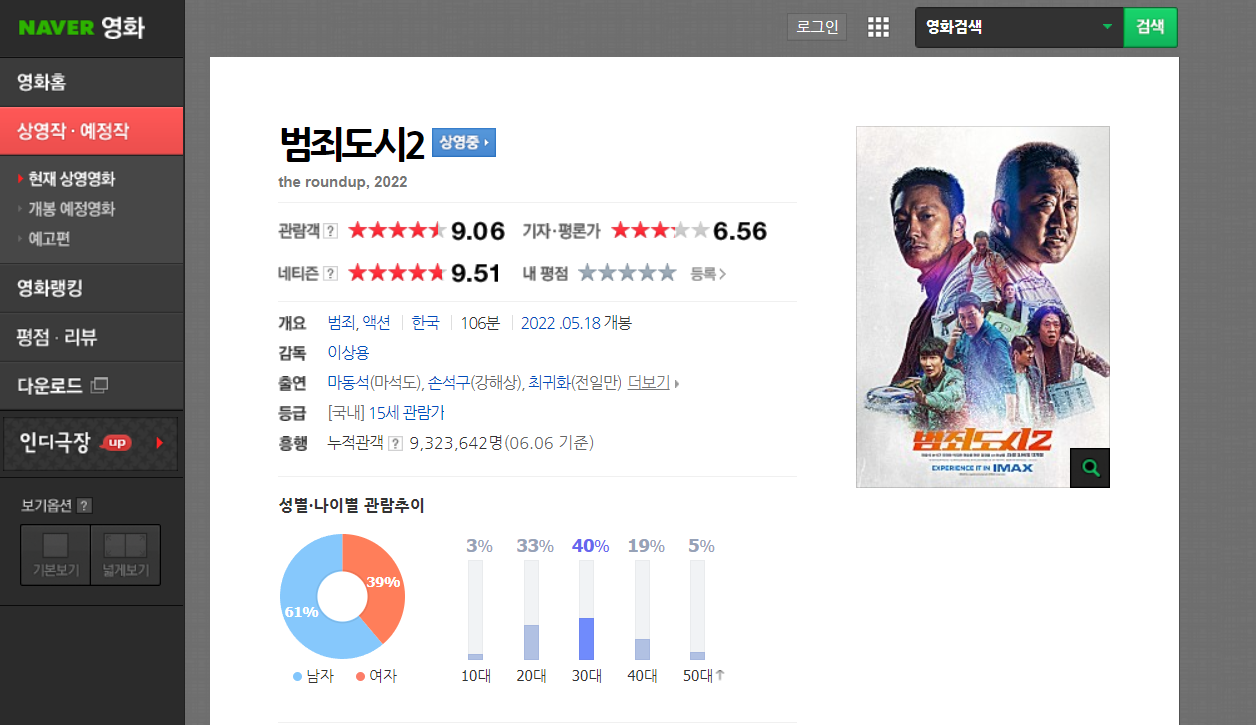

In [2]:
Image(bpc.MV_TOP10_DTL)

### <font color='blue'>2단계 : 상세페이지 크롤링 </font>
> **항목** : ~순위, 영화명, 변동폭,~ **평점(관람객/평론가/네티즌), 장르, 감독, 출연, 등급**

In [3]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

import pandas as pd
import re

In [4]:
df = pd.read_csv('data/movie_top10.csv', encoding='UTF-8', index_col='순위')
df

,영화명,변동폭,링크
순위,,,
1,범죄도시2,0,https://movie.naver.com/movie/bi/mi/basic.nave...
2,쥬라기 월드: 도미니언,0,https://movie.naver.com/movie/bi/mi/basic.nave...
3,브로커,0,https://movie.naver.com/movie/bi/mi/basic.nave...
4,닥터 스트레인지: 대혼돈의 멀티버스,0,https://movie.naver.com/movie/bi/mi/basic.nave...
5,니 부모 얼굴이 보고 싶다,1,https://movie.naver.com/movie/bi/mi/basic.nave...
6,그대가 조국,-1,https://movie.naver.com/movie/bi/mi/basic.nave...
7,마녀(魔女) Part2. The Other One,0,https://movie.naver.com/movie/bi/mi/basic.nave...
8,카시오페아,0,https://movie.naver.com/movie/bi/mi/basic.nave...
9,탑건: 매버릭,0,https://movie.naver.com/movie/bi/mi/basic.nave...


In [5]:
url_page = df['링크'][1]
url_page

'https://movie.naver.com/movie/bi/mi/basic.naver?code=192608'

In [6]:
html = urlopen(url_page)
soup = BeautifulSoup(html, "lxml")
soup.title

<title>범죄도시2 : 네이버 영화</title>

In [7]:
tag_infos = soup.find_all('div', 'mv_info')
len(tag_infos)

2

In [8]:
# tag_infos[0] 인경우, 네티즌 평가정보를 못가져 옴
# mv_info = tag_infos[0]
# mv_info = mv_info.get_text()
# mv_info = mv_info.replace('\n', ' ')
# mv_info = mv_info.replace('\r', ' ')
# mv_info = mv_info.replace('\t', ' ')
# mv_info

In [9]:
# print(mv_info)

In [10]:
tag_infos = soup.find_all('div', 'mv_info_area')
len(tag_infos)

1

In [11]:
mv_info_area = soup.find('div', 'mv_info_area')
type(mv_info_area)

bs4.element.Tag

In [12]:
# tag_infos[0] 인경우, 네티즌 평가정보를 못가져 옴
mv_info = mv_info_area.get_text()
mv_info = mv_info.replace('\n', ' ')
mv_info = mv_info.replace('\r', ' ')
mv_info = mv_info.replace('\t', ' ')
# mv_info

In [13]:
print(mv_info)

   범죄도시2 상영중 the roundup, 2022     관람객 평점 관람객 평점 도움말            관람객 평점은 네이버영화에서예매하고 실제 관람 후 이용자들이작성한 평점입니다.         닫기            참여 2,402명            관람객 평점 9.07점9.07       기자 · 평론가 평점  6.56        네티즌 평점네티즌 평점 도움말    네티즌 평점 도움말                                    국내 개봉작입니다. 관람하신 영화에 대한 평점을 남겨주세요. 네티즌 평점 뿐 아니라 블로그 영화 리뷰작성 시 등록한 별점도 함께 반영됩니다.                         닫기           참여 21,365명          9.51       내 평점  0점 등록         내 평점       삭제 닫기      개요()    범죄,                            액션   한국  106분    2022 .05.18 개봉                                 감독 이상용 출연 마동석(마석도), 손석구(강해상), 최귀화(전일만)더보기 등급          [국내]                  15세 관람가   흥행    누적관객누적관객 도움말   네티즌 평점 도움말           영화진흥위원회 영화관 입장권 통합전산망 제공           닫기   9,575,030명(06.08 기준)      성별·나이별 관람추이        남자 여자      3%    10대   34%    20대   40%    30대   18%    40대   5%    50대 이상          예매하기  영화관람후 평점을 작성하시면 네이버페이 포인트 500원을 드립니다! 닫기               포스터 크게보기   


### <font color='brown'> Regular Expression 관련 사이트
- http://regexr.com/   : text 정보를 re로 테스트
- https://regexper.com/ : 작성된 re를 다이어그램으로 표현

#### <font color='#00AAFF'>평점 : 관람객 / 평론가 / 네티즌</font>

In [14]:
main_score = mv_info_area.find_all('div', 'main_score')
len(main_score)

1

In [15]:
star_scores = mv_info_area.find_all('div', 'star_score')
len(star_scores)

5

In [16]:
star_scores[0].get_text().strip()

'관람객 평점 9.07점9.07'

In [17]:
for idx in range(len(star_scores)):
    print('[{}] {}'.format(idx+1, star_scores[idx].get_text().strip()))

[1] 관람객 평점 9.07점9.07
[2] 6.56
[3] 9.51
[4] 0점
등록
[5] 


In [18]:
Scores = list()

for star_score in star_scores:
    each_score = star_score.get_text()
    re_score = re.search('\d{1,2}\.\d{1,2}', each_score)
    
    if re_score is not None:
        score = re_score.group()
        # print('[{}]'.format(score))
        Scores.append(score)
    else :
        pass
        # print('평점 아님!!!')
        

Scores

['9.07', '6.56', '9.51']

In [19]:
if len(Scores) > 2:
    score1 = Scores[0]
    score2 = Scores[1]
    score3 = Scores[2]
else:
    score1 = '0.00'
    score2 = '0.00'
    score3 = '0.00'
    
"관람객:{} / 평론가:{} / 네티즌:{}".format(score1, score2, score3)

'관람객:9.07 / 평론가:6.56 / 네티즌:9.51'

#### <font color='#00AAFF'>영화정보 : 개요, 감독, 출연, 등급, 흥행</font>

In [20]:
info_spec = mv_info_area.find('dl', 'info_spec')
# info_spec = info_spec.get_text()
# info_spec
# print(info_spec.prettify())

In [21]:
arr_dt = info_spec.find_all('dt')
len(arr_dt)

5

In [22]:
arr_dd = info_spec.find_all('dd')
len(arr_dd)

5

In [23]:
dt_step = [ 'step1', 'step2', 'step3', 'step4', 'step9' ]

In [24]:
arr_dt[0]

<dt class="step1"><em>개요()</em></dt>

In [25]:
idx = 0
dt_class = arr_dt[idx]['class'][0]
dt_class

'step1'

In [26]:
type(arr_dt[idx])

bs4.element.Tag

In [27]:
arr_dt[idx]

<dt class="step1"><em>개요()</em></dt>

In [28]:
genre     = None
director  = None
casting   = None
rating    = None
ticketing = None

for idx in range(len(arr_dt)):
    dt_class = arr_dt[idx]['class'][0]
    dd_value = arr_dd[idx]
    print('{} : {} -> {}'.format(idx, dt_class, type(dd_value)))
    
    if dt_class=='step1':
        genreTag =  dd_value
        
    elif dt_class=='step2':
        directorTag =  dd_value
        
    elif dt_class=='step3':
        castingTag =  dd_value
        
    elif dt_class=='step4':
        ratingTag =  dd_value
        
    elif dt_class=='step9':
        ticketingTag =  dd_value
        

0 : step1 -> <class 'bs4.element.Tag'>
1 : step2 -> <class 'bs4.element.Tag'>
2 : step3 -> <class 'bs4.element.Tag'>
3 : step4 -> <class 'bs4.element.Tag'>
4 : step9 -> <class 'bs4.element.Tag'>


#### <font color='#00AAFF'>장르</font>

In [29]:
genre = genreTag
genre = genreTag.find('span').get_text()
genre = genre.replace('\n', '')
genre = genre.replace('\r', '')
genre = genre.replace('\t', '')
genre = genre.strip()
genre

'범죄, 액션'

#### <font color='#00AAFF'>감독</font>

In [30]:
director = directorTag
director = directorTag.get_text()
director = director.strip()
director

'이상용'

#### <font color='#00AAFF'>출연</font>

In [31]:
casting = castingTag
casting = castingTag.get_text()
casting = casting.replace('더보기', '')
casting = casting.strip()
casting

'마동석(마석도), 손석구(강해상), 최귀화(전일만)'

#### <font color='#00AAFF'>등급</font>

In [32]:
rating = ratingTag
rating = ratingTag.get_text()
rating = rating.replace('\n', '')
rating = rating.replace('\r', '')
rating = rating.replace('\t', '')
rating = rating.strip()
rating

'[국내] 15세 관람가'

#### <font color='#00AAFF'>흥행 : 누적관객</font>

In [33]:
ticketing = ticketingTag
ticketing = ticketingTag.find('p').get_text()
ticketing = ticketing.strip()
ticketing

'9,575,030명(06.08 기준)'

#### <font color='#00AAFF'>OK! 이제부터 모듈로 묶자!</font>

In [34]:
# star_scores = mv_info_area.find_all('div', 'star_score')
def get_scores(star_scores):
    '''
    관람객, 평론가, 네티즌의 평점을 리턴
    Return : str()
    '''
    arr_score = list()
    for star_score in star_scores:
        each_score = star_score.get_text()
        re_score = re.search('\d{1,2}\.\d{1,2}', each_score)

        if re_score is not None:
            score = re_score.group()
            arr_score.append(score)
            # print('[{}]'.format(score))
        else :
            pass

    if len(arr_score) > 2:
        score1 = arr_score[0]
        score2 = arr_score[1]
        score3 = arr_score[2]
    else:
        score1 = '0.00'
        score2 = '0.00'
        score3 = '0.00'

    scores = "관람객:{} / 평론가:{} / 네티즌:{}".format(score1, score2, score3)
    return scores

In [35]:
star_scores = mv_info_area.find_all('div', 'star_score')
scores = get_scores(star_scores)
scores

'관람객:9.07 / 평론가:6.56 / 네티즌:9.51'

In [36]:
# info_spec = mv_info_area.find('dl', 'info_spec')
def get_movie_info(info_spec):
    '''
    영화정보(장르, 감독, 출연, 등급, 관객수)를 리턴
    Return : dict()
    '''
    arr_dt = info_spec.find_all('dt')
    arr_dd = info_spec.find_all('dd')

    dt_step = [ 'step1', 'step2', 'step3', 'step4', 'step9' ]
    mv_dict = {
        'genre'     : None,
        'director'  : None,
        'casting'   : None,
        'rating'    : None,
        'ticketing' : None,
    }

    for idx in range(len(arr_dt)):
        dt_class = arr_dt[idx]['class'][0]
        dd_value = arr_dd[idx]
        # print('{} : {} -> {}'.format(idx, dt_class, type(dd_value)))

        mv_dict = collect_mv_dict(mv_dict, dt_class, dd_value)
        
    return mv_dict
    

def collect_mv_dict(mv_dict, dt_class, dd_value):
    if dt_class=='step1':
        genreTag =  dd_value
        genre = genreTag
        genre = genreTag.find('span').get_text()
        genre = genre.replace('\n', '')
        genre = genre.replace('\r', '')
        genre = genre.replace('\t', '')
        genre = genre.strip()
        mv_dict['genre'] = genre        
        
    elif dt_class=='step2':
        directorTag =  dd_value
        director = directorTag
        director = directorTag.get_text()
        director = director.strip()
        mv_dict['director'] = director        
        
    elif dt_class=='step3':
        castingTag =  dd_value
        casting = castingTag
        casting = castingTag.get_text()
        casting = casting.replace('더보기', '')
        casting = casting.strip()
        mv_dict['casting'] = casting

    elif dt_class=='step4':
        ratingTag =  dd_value
        rating = ratingTag
        rating = ratingTag.get_text()
        rating = rating.replace('\n', '')
        rating = rating.replace('\r', '')
        rating = rating.replace('\t', '')
        rating = rating.strip()
        mv_dict['rating'] = rating

    elif dt_class=='step9':
        ticketingTag =  dd_value
        ticketing = ticketingTag
        ticketing = ticketingTag.find('p').get_text()
        ticketing = ticketing.strip()
        mv_dict['ticketing'] = ticketing

    return mv_dict

In [37]:
info_spec = mv_info_area.find('dl', 'info_spec')
type(info_spec)

bs4.element.Tag

In [38]:
mv_dict = get_movie_info(info_spec)
mv_dict

{'genre': '범죄, 액션',
 'director': '이상용',
 'casting': '마동석(마석도), 손석구(강해상), 최귀화(전일만)',
 'rating': '[국내] 15세 관람가',
 'ticketing': '9,575,030명(06.08 기준)'}

In [39]:
# from tqdm import tqdm_notebook
from tqdm.notebook import tqdm

def crawl_movie_detail_page(df) :
    '''
    영화상세페이지를 크롤링 한후, DataFrame에 컬럼정보를 추가한다.
    Return : DataFrame
    '''

    Score     = []
    Genre     = []
    Director  = []
    Casting   = []
    Rating    = []
    Ticketing = []

    for url_page in tqdm(df['링크']):

        html = urlopen(url_page)
        soup = BeautifulSoup(html, "lxml")

        mv_info_area = soup.find('div', 'mv_info_area')

        # 스코어
        star_scores = mv_info_area.find_all('div', 'star_score')
        scores = get_scores(star_scores)

        # 영화정보
        info_spec = mv_info_area.find('dl', 'info_spec')
        mv_dict = get_movie_info(info_spec)

        # 리스트에 담기
        Score.append(scores)
        Genre.append(mv_dict['genre'])
        Director.append(mv_dict['director'])
        Casting.append(mv_dict['casting'])
        Rating.append(mv_dict['rating'])
        Ticketing.append(mv_dict['ticketing'])

    # DataFrame에 추가
    df['평점'] = Score
    df['장르'] = Genre
    df['감독'] = Director
    df['출연'] = Casting
    df['등급'] = Rating
    df['흥행'] = Ticketing

    print('Crawling is Finished !!!')
        
    return df

#### <font color='#00AAFF'>크롤링 시뮬레이션</font>

In [40]:
df

,영화명,변동폭,링크
순위,,,
1,범죄도시2,0,https://movie.naver.com/movie/bi/mi/basic.nave...
2,쥬라기 월드: 도미니언,0,https://movie.naver.com/movie/bi/mi/basic.nave...
3,브로커,0,https://movie.naver.com/movie/bi/mi/basic.nave...
4,닥터 스트레인지: 대혼돈의 멀티버스,0,https://movie.naver.com/movie/bi/mi/basic.nave...
5,니 부모 얼굴이 보고 싶다,1,https://movie.naver.com/movie/bi/mi/basic.nave...
6,그대가 조국,-1,https://movie.naver.com/movie/bi/mi/basic.nave...
7,마녀(魔女) Part2. The Other One,0,https://movie.naver.com/movie/bi/mi/basic.nave...
8,카시오페아,0,https://movie.naver.com/movie/bi/mi/basic.nave...
9,탑건: 매버릭,0,https://movie.naver.com/movie/bi/mi/basic.nave...


In [41]:
# try : 
#     result_df = crawl_detail(df)
# except Exception as err:
#     print(err)
    

In [42]:
result_df = crawl_movie_detail_page(df)

  0%|          | 0/10 [00:00<?, ?it/s]

Crawling is Finished !!!


In [43]:
result_df

,영화명,변동폭,링크,평점,장르,감독,출연,등급,흥행
순위,,,,,,,,,
1,범죄도시2,0,https://movie.naver.com/movie/bi/mi/basic.nave...,관람객:9.07 / 평론가:6.56 / 네티즌:9.51,"범죄, 액션",이상용,"마동석(마석도), 손석구(강해상), 최귀화(전일만)",[국내] 15세 관람가,"9,575,030명(06.08 기준)"
2,쥬라기 월드: 도미니언,0,https://movie.naver.com/movie/bi/mi/basic.nave...,관람객:6.85 / 평론가:6.40 / 네티즌:6.18,"액션, 모험",콜린 트레보로우,"크리스 프랫(오웬 그래디), 브라이스 달라스 하워드(클레어 디어링)",[국내] 12세 관람가,"2,266,199명(06.08 기준)"
3,브로커,0,https://movie.naver.com/movie/bi/mi/basic.nave...,관람객:7.44 / 평론가:6.80 / 네티즌:6.23,드라마,고레에다 히로카즈,"송강호, 강동원, 배두나",[국내] 12세 관람가,"152,364명(06.08 기준)"
4,닥터 스트레인지: 대혼돈의 멀티버스,0,https://movie.naver.com/movie/bi/mi/basic.nave...,관람객:7.79 / 평론가:6.80 / 네티즌:7.33,"액션, 판타지, 모험",샘 레이미,"베네딕트 컴버배치(닥터 스트레인지), 엘리자베스 올슨(완다 막시모프 / 스칼렛 위치)",[국내] 12세 관람가,"5,861,671명(06.08 기준)"
5,니 부모 얼굴이 보고 싶다,1,https://movie.naver.com/movie/bi/mi/basic.nave...,관람객:7.75 / 평론가:6.14 / 네티즌:7.68,드라마,김지훈,설경구,[국내] 15세 관람가,None
6,그대가 조국,-1,https://movie.naver.com/movie/bi/mi/basic.nave...,관람객:9.82 / 평론가:5.00 / 네티즌:7.22,다큐멘터리,이승준,None,[국내] 12세 관람가,"300,516명(06.08 기준)"
7,마녀(魔女) Part2. The Other One,0,https://movie.naver.com/movie/bi/mi/basic.nave...,관람객:0.00 / 평론가:0.00 / 네티즌:0.00,액션,박훈정,"신시아, 박은빈, 서은수",[국내] 15세 관람가,None
8,카시오페아,0,https://movie.naver.com/movie/bi/mi/basic.nave...,관람객:8.38 / 평론가:6.50 / 네티즌:9.22,드라마,신연식,"안성기(인우), 서현진(수진), 주예림(지나)",[국내] 12세 관람가,"17,954명(06.08 기준)"
9,탑건: 매버릭,0,https://movie.naver.com/movie/bi/mi/basic.nave...,관람객:0.00 / 평론가:0.00 / 네티즌:0.00,액션,조셉 코신스키,"톰 크루즈(매버릭), 마일즈 텔러(루스터), 제니퍼 코넬리(페니)",[국내] 12세 관람가,None


In [44]:
columns = list(result_df.columns)
columns

['영화명', '변동폭', '링크', '평점', '장르', '감독', '출연', '등급', '흥행']

In [45]:
columns.append(columns.pop(2))
columns

['영화명', '변동폭', '평점', '장르', '감독', '출연', '등급', '흥행', '링크']

In [46]:
result_df = result_df.loc[:, columns[:-1]]
result_df

,영화명,변동폭,평점,장르,감독,출연,등급,흥행
순위,,,,,,,,
1,범죄도시2,0,관람객:9.07 / 평론가:6.56 / 네티즌:9.51,"범죄, 액션",이상용,"마동석(마석도), 손석구(강해상), 최귀화(전일만)",[국내] 15세 관람가,"9,575,030명(06.08 기준)"
2,쥬라기 월드: 도미니언,0,관람객:6.85 / 평론가:6.40 / 네티즌:6.18,"액션, 모험",콜린 트레보로우,"크리스 프랫(오웬 그래디), 브라이스 달라스 하워드(클레어 디어링)",[국내] 12세 관람가,"2,266,199명(06.08 기준)"
3,브로커,0,관람객:7.44 / 평론가:6.80 / 네티즌:6.23,드라마,고레에다 히로카즈,"송강호, 강동원, 배두나",[국내] 12세 관람가,"152,364명(06.08 기준)"
4,닥터 스트레인지: 대혼돈의 멀티버스,0,관람객:7.79 / 평론가:6.80 / 네티즌:7.33,"액션, 판타지, 모험",샘 레이미,"베네딕트 컴버배치(닥터 스트레인지), 엘리자베스 올슨(완다 막시모프 / 스칼렛 위치)",[국내] 12세 관람가,"5,861,671명(06.08 기준)"
5,니 부모 얼굴이 보고 싶다,1,관람객:7.75 / 평론가:6.14 / 네티즌:7.68,드라마,김지훈,설경구,[국내] 15세 관람가,None
6,그대가 조국,-1,관람객:9.82 / 평론가:5.00 / 네티즌:7.22,다큐멘터리,이승준,None,[국내] 12세 관람가,"300,516명(06.08 기준)"
7,마녀(魔女) Part2. The Other One,0,관람객:0.00 / 평론가:0.00 / 네티즌:0.00,액션,박훈정,"신시아, 박은빈, 서은수",[국내] 15세 관람가,None
8,카시오페아,0,관람객:8.38 / 평론가:6.50 / 네티즌:9.22,드라마,신연식,"안성기(인우), 서현진(수진), 주예림(지나)",[국내] 12세 관람가,"17,954명(06.08 기준)"
9,탑건: 매버릭,0,관람객:0.00 / 평론가:0.00 / 네티즌:0.00,액션,조셉 코신스키,"톰 크루즈(매버릭), 마일즈 텔러(루스터), 제니퍼 코넬리(페니)",[국내] 12세 관람가,None


In [47]:
result_df.loc[1]

영화명                             범죄도시2
변동폭                                 0
평점     관람객:9.07 / 평론가:6.56 / 네티즌:9.51
장르                             범죄, 액션
감독                                이상용
출연       마동석(마석도), 손석구(강해상), 최귀화(전일만)
등급                       [국내] 15세 관람가
흥행               9,575,030명(06.08 기준)
Name: 1, dtype: object

In [48]:
file_name='data/movie_top10_final.csv'
result_df.to_csv(file_name, sep=',', encoding='UTF-8')

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>